<a href="https://colab.research.google.com/github/GeorgeSakketos/Data_Mining_2025/blob/main/tedeproject2025partAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑🏻‍🎓 Ομάδα
**Θεοδωρίδης Ανέστης - 1115201500212**

**Σακκέτος Γεώργιος - 1115202000177**

# 📊 Part A – Amazon Reviews 2023: Data Exploration & Feature Engineering

Ανάλυση δεδομένων Amazon Reviews 2023 σε 5 κατηγορίες προϊόντων, με στόχο την εξαγωγή γνώσης, sentiment analysis και υπολογισμό σύνθετων δεικτών.


## 🧹 Task 1: Εξερεύνηση και Προκαταρκτική Επεξεργασία Δεδομένων

## ✅ Block 1 – Εγκατάσταση απαραίτητων βιβλιοθηκών

In [1]:
!pip install -U datasets pandas matplotlib seaborn nltk gensim

## ✅ Block 2 – Εισαγωγή βιβλιοθηκών

In [2]:
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

## ✅ Block 3 – Λήψη 5 κατηγοριών από Hugging Face (1000 εγγραφές η κάθε μία)

## 🔽 Λήψη Δεδομένων από Hugging Face

Χρησιμοποιούμε `datasets` με `streaming=True` για να φορτώσουμε 1000 reviews ανά κατηγορία από το dataset McAuley-Lab/Amazon-Reviews-2023.


In [3]:
categories = [
    "Electronics",
    "Books",
    "Home_and_Kitchen",
    "Clothing_Shoes_and_Jewelry",
    "Sports_and_Outdoors"
]

max_rows = 1000

In [4]:
for category in categories:
    review_category = f"raw_review_{category}"
    print(f"Κατεβάζω: {review_category}...")
    dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", review_category, split="full", streaming=True, trust_remote_code=True)

    data_list = []
    for i, row in enumerate(dataset):
        data_list.append(row)
        if i >= max_rows - 1:
            break

    review_df = pd.DataFrame(data_list)
    review_df.to_csv(f"amazon_{review_category}.csv", index=False)
    print(f"✅ Αποθηκεύτηκε: amazon_{review_category}.csv")

Κατεβάζω: raw_review_Electronics...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Αποθηκεύτηκε: amazon_raw_review_Electronics.csv
Κατεβάζω: raw_review_Books...
✅ Αποθηκεύτηκε: amazon_raw_review_Books.csv
Κατεβάζω: raw_review_Home_and_Kitchen...
✅ Αποθηκεύτηκε: amazon_raw_review_Home_and_Kitchen.csv
Κατεβάζω: raw_review_Clothing_Shoes_and_Jewelry...
✅ Αποθηκεύτηκε: amazon_raw_review_Clothing_Shoes_and_Jewelry.csv
Κατεβάζω: raw_review_Sports_and_Outdoors...
✅ Αποθηκεύτηκε: amazon_raw_review_Sports_and_Outdoors.csv


In [5]:
def flatten_image_struct(example):
    images_raw = example.get('images', '[]')
    try:
        images = json.loads(images_raw) if isinstance(images_raw, str) else images_raw
    except json.JSONDecodeError:
        images = []
    example['image_urls'] = [img.get('hi_res', '') for img in images if isinstance(img, dict)]
    return example

for category in categories:
    meta_category = f"raw_meta_{category}"
    print(f"Κατεβάζω: {meta_category}...")

    dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", meta_category, split="full", streaming=True, trust_remote_code=True)
    dataset = dataset.map(flatten_image_struct)

    data_list = []
    for i, row in enumerate(dataset):
        data_list.append(row)
        if i >= max_rows - 1:
            break

    meta_df = pd.DataFrame(data_list)

    meta_df.to_csv(f"amazon_{meta_category}.csv", index=False)
    print(f"✅ Αποθηκεύτηκε: amazon_{meta_category}.csv")

Κατεβάζω: raw_meta_Electronics...
✅ Αποθηκεύτηκε: amazon_raw_meta_Electronics.csv
Κατεβάζω: raw_meta_Books...
✅ Αποθηκεύτηκε: amazon_raw_meta_Books.csv
Κατεβάζω: raw_meta_Home_and_Kitchen...
✅ Αποθηκεύτηκε: amazon_raw_meta_Home_and_Kitchen.csv
Κατεβάζω: raw_meta_Clothing_Shoes_and_Jewelry...
✅ Αποθηκεύτηκε: amazon_raw_meta_Clothing_Shoes_and_Jewelry.csv
Κατεβάζω: raw_meta_Sports_and_Outdoors...
✅ Αποθηκεύτηκε: amazon_raw_meta_Sports_and_Outdoors.csv


## ✅ Block 4 – Φόρτωση ενός CSV (π.χ. Electronics)

In [6]:
review_df = pd.read_csv("amazon_raw_review_Electronics.csv")
review_df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3.0,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,[{'small_image_url': 'https://m.media-amazon.c...,B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1658185117948,0,True
1,1.0,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1592678549731,0,True
2,5.0,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093017534,0,True
3,5.0,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,1290278495000,18,True
4,5.0,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,1676601581238,0,True


In [7]:
meta_df = pd.read_csv("amazon_raw_meta_Electronics.csv")
meta_df.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author,image_urls
0,All Electronics,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[],['Teleporter V3 The “Teleporter V3” kit sets a...,NaN,"{'hi_res': [None], 'large': ['https://m.media-...","{'title': [], 'url': [], 'user_id': []}",Fat Shark,"['Electronics', 'Television & Video', 'Video G...","{""Date First Available"": ""August 2, 2014"", ""Ma...",B00MCW7G9M,NaN,NaN,NaN,[]
1,All Electronics,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,"['UPC: 662774021904', 'Weight: 0.600 lbs']",['HDMI In - HDMI Out'],NaN,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",SIIG,"['Electronics', 'Television & Video', 'Accesso...","{""Product Dimensions"": ""0.83 x 4.17 x 2.05 inc...",B00YT6XQSE,NaN,NaN,NaN,[]
2,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,['WARNING: Please IDENTIFY MODEL NUMBER on the...,[],19.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': ['AL 2Sides Video', 'MacBook Protect...",Digi-Tatoo,"['Electronics', 'Computers & Accessories', 'La...","{""Brand"": ""Digi-Tatoo"", ""Color"": ""Fresh Marble...",B07SM135LS,NaN,NaN,NaN,[]
3,AMAZON FASHION,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,['☛NotoCity 22mm band is designed for Vivoacti...,[],9.99,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",NotoCity,"['Electronics', 'Wearable Technology', 'Clips,...","{""Date First Available"": ""May 29, 2020"", ""Manu...",B089CNGZCW,NaN,NaN,NaN,[]
4,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,"['New Droid X Essentials Combo Pack', 'Exclusi...",['all Genuine High Quality Motorola Made Acces...,14.99,"{'hi_res': [None, None, None, None, None], 'la...","{'title': [], 'url': [], 'user_id': []}",Verizon,"['Electronics', 'Computers & Accessories', 'Co...","{""Product Dimensions"": ""11.6 x 6.9 x 3.1 inche...",B004E2Z88O,NaN,NaN,NaN,[]


## ✅ Block 5 – Έλεγχος Στηλών

In [8]:
print(review_df.columns.tolist())
review_df.info()

['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rating             1000 non-null   float64
 1   title              1000 non-null   object 
 2   text               1000 non-null   object 
 3   images             1000 non-null   object 
 4   asin               1000 non-null   object 
 5   parent_asin        1000 non-null   object 
 6   user_id            1000 non-null   object 
 7   timestamp          1000 non-null   int64  
 8   helpful_vote       1000 non-null   int64  
 9   verified_purchase  1000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 71.4+ KB


In [9]:
print(meta_df.columns.tolist())
meta_df.info()

['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author', 'image_urls']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   main_category    989 non-null    object 
 1   title            1000 non-null   object 
 2   average_rating   1000 non-null   float64
 3   rating_number    1000 non-null   int64  
 4   features         1000 non-null   object 
 5   description      1000 non-null   object 
 6   price            432 non-null    float64
 7   images           1000 non-null   object 
 8   videos           1000 non-null   object 
 9   store            995 non-null    object 
 10  categories       1000 non-null   object 
 11  details          1000 non-null   object 
 12  parent_asin      1000 n

## ✅ Block 6a – Καθαρισμός για Όλες τις Κατηγορίες Review

## 🧹 Καθαρισμός Δεδομένων

Αφαίρεση εγγραφών με κενές τιμές στα πεδία `text`, `rating`, `timestamp`. Μετατροπή `timestamp` σε datetime όπου είναι διαθέσιμο.

In [10]:
def normalize_text(text):
    if isinstance(text, list):
        text = " ".join(text)  # Join list elements if it's a list
    if not isinstance(text, str):
        return ""

    text = text.lower()  # lowercase
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = text.strip()  # trim
    return text

In [11]:
for category in categories:
  review_category = f"raw_review_{category}"
  print(f"➡️ Καθαρίζω την κατηγορία: {review_category}")

  # Φόρτωση αρχείου
  file_path = f"amazon_{review_category}.csv"
  review_df = pd.read_csv(file_path)

  # Καθαρισμός: αφαίρεση εγγραφών με κενά σε βασικά πεδία
  review_df = review_df.dropna(subset=["text", "rating"], how="any")

  # Καθαρισμός: αφαίρεση στήλων μου δεν χρειάζονται
  review_df = review_df.drop(columns=["images"])

  # Μετατροπή timestamp από milliseconds σε datetime (αν υπάρχει)
  if "timestamp" in review_df.columns:
      review_df["timestamp"] = pd.to_numeric(review_df["timestamp"], errors="coerce")
      review_df["timestamp"] = pd.to_datetime(review_df["timestamp"], unit="ms", errors="coerce")

  # Αποθήκευση καθαρισμένου αρχείου
  cleaned_path = f"amazon_cleaned_{review_category}.csv"
  review_df.to_csv(cleaned_path, index=False)
  print(f"✅ Αποθηκεύτηκε: {cleaned_path}\n")

➡️ Καθαρίζω την κατηγορία: raw_review_Electronics
✅ Αποθηκεύτηκε: amazon_cleaned_raw_review_Electronics.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Books
✅ Αποθηκεύτηκε: amazon_cleaned_raw_review_Books.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Home_and_Kitchen
✅ Αποθηκεύτηκε: amazon_cleaned_raw_review_Home_and_Kitchen.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Clothing_Shoes_and_Jewelry
✅ Αποθηκεύτηκε: amazon_cleaned_raw_review_Clothing_Shoes_and_Jewelry.csv

➡️ Καθαρίζω την κατηγορία: raw_review_Sports_and_Outdoors
✅ Αποθηκεύτηκε: amazon_cleaned_raw_review_Sports_and_Outdoors.csv



## ✅ Block 6b – Καθαρισμός για Όλες τις Κατηγορίες  Meta

In [12]:
for category in categories:
    meta_category = f"raw_meta_{category}"
    print(f"➡️ Καθαρίζω την κατηγορία: {meta_category}")

    # Φόρτωση αρχείου
    file_path = f"amazon_{meta_category}.csv"
    meta_df = pd.read_csv(file_path)

    # Καθαρισμός: αφαίρεση εγγραφών με κενά σε βασικά πεδία
    meta_df = meta_df.dropna(subset=["main_category", "title", "price", "average_rating", "store"], how="any")

    # Καθαρισμός: αφαίρεση στήλων μου δεν χρειάζονται
    meta_df = meta_df.drop(columns=["bought_together", "subtitle", "author", "images", "videos"])

    # Μετατροπή σε αριθμητικές τιμές (για αποφυγή σφαλμάτων)
    meta_df["price"] = pd.to_numeric(meta_df["price"], errors="coerce")
    meta_df["average_rating"] = pd.to_numeric(meta_df["average_rating"], errors="coerce")

    if "description" in meta_df.columns:
      meta_df["description"] = meta_df["description"].apply(normalize_text)

    # Προαιρετικά: Αφαίρεση εγγραφών με μη έγκυρες τιμές
    meta_df = meta_df.dropna(subset=["price", "average_rating"], how="any")

    # Αποθήκευση καθαρισμένου αρχείου
    cleaned_path = f"amazon_cleaned_{meta_category}.csv"
    meta_df.to_csv(cleaned_path, index=False)
    print(f"✅ Αποθηκεύτηκε: {cleaned_path}\n")

➡️ Καθαρίζω την κατηγορία: raw_meta_Electronics
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Electronics.csv

➡️ Καθαρίζω την κατηγορία: raw_meta_Books
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Books.csv

➡️ Καθαρίζω την κατηγορία: raw_meta_Home_and_Kitchen
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Home_and_Kitchen.csv

➡️ Καθαρίζω την κατηγορία: raw_meta_Clothing_Shoes_and_Jewelry
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Clothing_Shoes_and_Jewelry.csv

➡️ Καθαρίζω την κατηγορία: raw_meta_Sports_and_Outdoors
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Sports_and_Outdoors.csv



## ✅ Block 7 – Έλεγχος και επιβεβαίωση

In [13]:
print(review_df.isnull().sum())
review_df.head()

rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


,rating,title,text,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Crazy comfy!,Not gonna lie- they are not much to look at. L...,B07F3BDT8T,B0BGFR76CF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2023-02-25 10:30:53.520,8,True
1,5.0,Excellent!,I love it. Pretty!,B00NXQLFQQ,B00NXQLFQQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:36:11.676,0,True
2,5.0,Best saddle pads,Huge fan of B Vertigo and this dressage pad do...,B08SVPR266,B0957WLR63,AGGZ357AO26RQZVRLGU4D4N52DZQ,2022-05-26 01:01:59.105,0,True
3,5.0,Perfect repair kit,"I have a great Weaver halter. Recently, the Ch...",B00IET8S80,B00IET8S80,AGGZ357AO26RQZVRLGU4D4N52DZQ,2021-07-26 20:21:51.189,0,True
4,5.0,Works great,This was great for a slightly too-short girth!...,B00DV0MKUY,B01C2SW7XA,AGGZ357AO26RQZVRLGU4D4N52DZQ,2021-04-07 21:43:31.976,0,True


In [14]:
print(meta_df.isnull().sum())
meta_df.head()

main_category     0
title             0
average_rating    0
rating_number     0
features          0
description       0
price             0
store             0
categories        0
details           0
parent_asin       0
image_urls        0
dtype: int64


,main_category,title,average_rating,rating_number,features,description,price,store,categories,details,parent_asin,image_urls
3,Sports & Outdoors,Bont Skates - Prostar Purple Suede Professiona...,4.2,36,['Roller Skates are not like your average shoe...,[],209.00,Bont,"['Sports & Outdoors', 'Sports', 'Skates, Skate...","{""Size"": ""Bont 5"", ""Color"": ""Purple"", ""Brand"":...",B08GC4GBWB,[]
5,AMAZON FASHION,Outerstuff NFL Youth 8-20 Short Sleeve Rash Guard,4.9,80,"['92% Polyester, 8% Spandex', 'Imported', 'Pul...",['kids will love the look and feel of this nfl...,16.99,Outerstuff,"['Sports & Outdoors', 'Fan Shop', 'Clothing', ...","{""Item Weight"": ""8 Ounces"", ""Item model number...",B01N547YCO,[]
8,Sports & Outdoors,Fish Skull Faux Bucktail,4.5,99,['Fish Skull Faux Bucktail Assorted Colors - B...,['description: tie flies of all types and size...,9.71,McFlyfoam Products,"['Sports & Outdoors', 'Hunting & Fishing', 'Fi...","{""Color"": ""Black"", ""Brand"": ""McFlyfoam Product...",B075KK7H1Z,[]
11,Sports & Outdoors,Bomber Fat Free Shad Jr.,4.8,15,"['Proven tournament-winner', 'Premier deep-div...","[""a bassmaster classic victory and over a mill...",7.99,BOMBER,"['Sports & Outdoors', 'Hunting & Fishing', 'Fi...","{""Color"": ""Sparkle Tiger"", ""Brand"": ""BOMBER"", ...",B00I9H216W,[]
12,Sports & Outdoors,"Men's Deadlift Belt - Nylon, Powerlifting, Wei...",4.5,74,"['Loop closure', '2 ply or 3 ply thickness for...","[""once you have found your measurement subtrac...",68.88,Spud inc.,"['Sports & Outdoors', 'Exercise & Fitness', 'S...","{""Size"": ""medium 27-32 inches waist at belly b...",B07BN4PZQF,[]


## ✅ Block 8

## 📊 Οπτικοποίηση: Κατανομή Βαθμολογιών

Δείχνουμε πώς κατανέμονται οι βαθμολογίες (ratings) των χρηστών για κάθε κατηγορία.

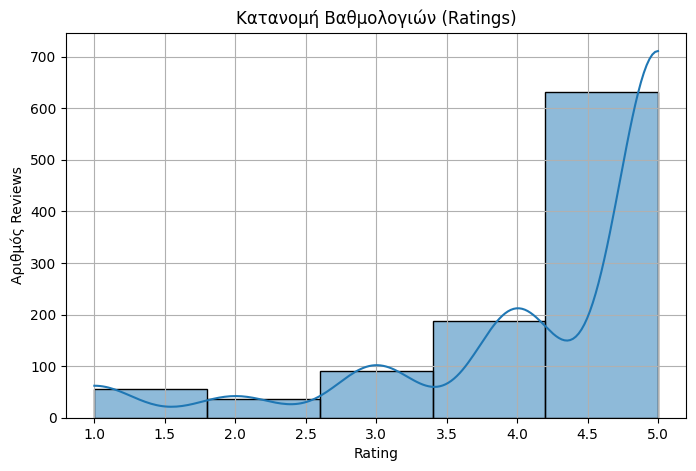

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(review_df["rating"], bins=5, kde=True)
plt.title("Κατανομή Βαθμολογιών (Ratings)")
plt.xlabel("Rating")
plt.ylabel("Αριθμός Reviews")
plt.grid(True)
plt.show()

## ✅ Block 9

## 📉 Προϊόντα με Χαμηλές Βαθμολογίες & Πολλά Reviews

Αναζητούμε προϊόντα με πολλά reviews αλλά χαμηλό average rating.

In [16]:
# Ομαδοποίηση ανά προϊόν (asin)
product_stats = review_df.groupby("asin").agg({
    "rating": ["mean", "count"],
    "text": list
}).reset_index()

# Ονομασία των στηλών
product_stats.columns = ["asin", "avg_rating", "review_count", "reviews"]

# Φιλτράρισμα: Πολλά reviews αλλά χαμηλή μέση βαθμολογία
low_rated_popular = product_stats[
    (product_stats["review_count"] >= 10) & (product_stats["avg_rating"] <= 2.5)
].sort_values(by="review_count", ascending=False)

# Εμφάνιση των top 5
low_rated_popular.head()

,asin,avg_rating,review_count,reviews


## ✅ Block 10 – Ανάλυση κοινών λέξεων στα reviews (word frequency)

## 💬 Συχνές Λέξεις σε Αρνητικά Reviews

Εξάγουμε λέξεις-κλειδιά από τα αρνητικά σχόλια για ποιοτική ανάλυση.

In [17]:
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

# Παίρνουμε όλες τις λέξεις από τα reviews των προϊόντων με χαμηλή βαθμολογία
all_texts = sum(low_rated_popular["reviews"].tolist(), [])
all_words = " ".join(all_texts).lower().split()
filtered_words = [word for word in all_words if word.isalpha() and word not in stop_words]

# Συχνότητα λέξεων
word_freq = Counter(filtered_words)
word_freq.most_common(20)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]

## ✅ Block 11

## 🏆 Top 5 Προϊόντα με τα Περισσότερα Reviews

Εντοπίζουμε τα πιο δημοφιλή προϊόντα βάσει αριθμού αξιολογήσεων.

In [18]:
# Ομαδοποίηση ανά προϊόν (asin) και μέτρηση πλήθους reviews
top_products = review_df.groupby("asin").agg({
    "rating": ["count", "mean"],
    "helpful_vote": "sum",
    "verified_purchase": "sum"
}).reset_index()

# Ονοματοδοσία στηλών
top_products.columns = ["asin", "review_count", "avg_rating", "total_helpful_votes", "verified_purchases"]

# Τα 5 προϊόντα με τα περισσότερα reviews
top_5 = top_products.sort_values(by="review_count", ascending=False).head(5)

top_5

# Συγχώνευση του top_5 με το αρχικό df για να πάρουμε τίτλους (π.χ. τον 1ο τίτλο ανά προϊόν)
product_titles = review_df[["asin", "title"]].drop_duplicates(subset="asin")

top_5_with_titles = top_5.merge(product_titles, on="asin", how="left")
top_5_with_titles

,asin,review_count,avg_rating,total_helpful_votes,verified_purchases,title
0,B018L2WM86,2,5.0,1,2,Add to Cart! This lantern is amazing!
1,B000W4RV6K,2,5.0,1,2,Perfect size to take daily for lunch.
2,B00FTEUTMQ,2,4.0,33,2,Yum
3,B00BGO0Q9O,2,3.5,0,0,Not as great as I thought.
4,B01L8MUHIS,2,5.0,15,2,Sharpal 6 in 1 pocket knife sharpener and surv...


## ✅ Block 12

## 📆 Μέση Βαθμολογία ανά Μήνα (όπου υπάρχει `timestamp`)

Ανάλυση χρονικής μεταβολής της βαθμολογίας (αν υπάρχουν έγκυρα δεδομένα ημερομηνίας).

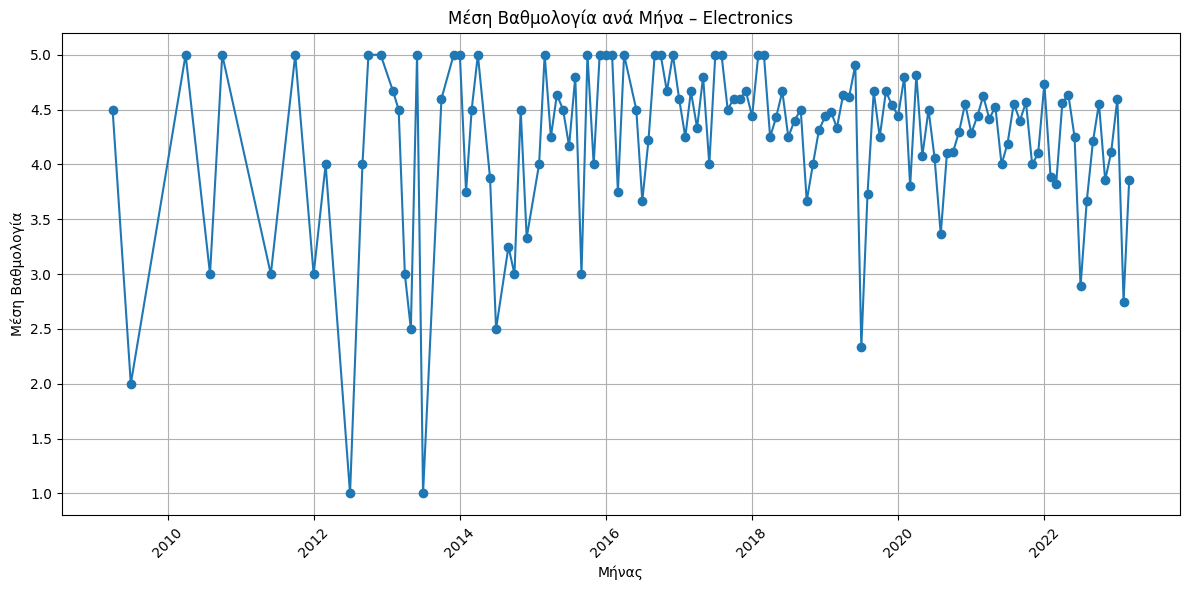

In [19]:
# Αφαίρεση γραμμών με μη έγκυρη ημερομηνία ή βαθμολογία
review_df = review_df.dropna(subset=["timestamp", "rating"])

# Δημιουργία νέας στήλης με μήνα και έτος
review_df["year_month"] = review_df["timestamp"].dt.to_period("M")

# Ομαδοποίηση ανά μήνα και υπολογισμός μέσης βαθμολογίας
monthly_avg = (
    review_df.groupby("year_month")["rating"]
    .mean()
    .reset_index()
)

# Μετατροπή της περιοδικής ημερομηνίας σε datetime για το γράφημα
monthly_avg["year_month"] = monthly_avg["year_month"].dt.to_timestamp()

# Γράφημα
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg["year_month"], monthly_avg["rating"], marker='o')
plt.title("Μέση Βαθμολογία ανά Μήνα – Electronics")
plt.xlabel("Μήνας")
plt.ylabel("Μέση Βαθμολογία")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## 💬 Task 2: Ανάλυση Συναισθήματος με VADER

## ✅ Block 13 – Υπολογισμός Sentiment με VADER

Χρησιμοποιούμε το VADER από το NLTK για να εξάγουμε `sentiment_score` από το κείμενο κάθε review.

In [20]:
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Φόρτωση του καθαρισμένου αρχείου (π.χ. Electronics)
review_df = pd.read_csv("cleaned_raw_review_Electronics.csv")

# VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Λειτουργία που επιστρέφει το compound score [-1, 1]
def get_sentiment(text):
    return sia.polarity_scores(text)["compound"]

# Νέα στήλη με sentiment score
review_df["sentiment_score"] = review_df["text"].apply(get_sentiment)

# Προεπισκόπηση
review_df[["rating", "sentiment_score", "text"]].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,rating,sentiment_score,text
0,3.0,-0.9581,First & most offensive: they reek of gasoline ...
1,1.0,-0.8945,These didn’t work. Idk if they were damaged in...
2,5.0,0.9742,I love these. They even come with a carry case...
3,5.0,0.8103,I was searching for a sturdy backpack for scho...
4,5.0,0.9062,I've bought these headphones three times becau...


## ✅ Block 14

## 🎯 Συνδυασμός Βαθμολογίας και Συναισθήματος

Κατασκευάζουμε νέο σκορ `final_sentiment` ως συνδυασμό του sentiment (60%) και της normalized βαθμολογίας (40%).

In [21]:
# Κανονικοποίηση βαθμολογίας (1-5) → (0.0 - 1.0)
review_df["normalized_rating"] = (review_df["rating"] - 1) / 4

# Συνδυασμός sentiment + rating με βάρη (π.χ. 60% συναίσθημα, 40% rating)
w1, w2 = 0.6, 0.4
review_df["final_sentiment"] = (w1 * review_df["sentiment_score"]) + (w2 * review_df["normalized_rating"])

# Προεπισκόπηση
review_df[["rating", "normalized_rating", "sentiment_score", "final_sentiment"]].head()

,rating,normalized_rating,sentiment_score,final_sentiment
0,3.0,0.5,-0.9581,-0.37486
1,1.0,0.0,-0.8945,-0.53670
2,5.0,1.0,0.9742,0.98452
3,5.0,1.0,0.8103,0.88618
4,5.0,1.0,0.9062,0.94372


## ✅ Block 15 – Οπτικοποίηση Sentiment vs Rating

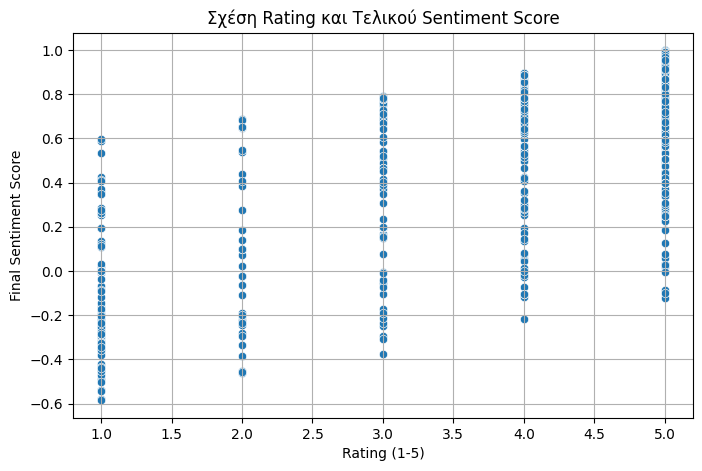

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=review_df, x="rating", y="final_sentiment")
plt.title("Σχέση Rating και Τελικού Sentiment Score")
plt.xlabel("Rating (1-5)")
plt.ylabel("Final Sentiment Score")
plt.grid(True)
plt.show()

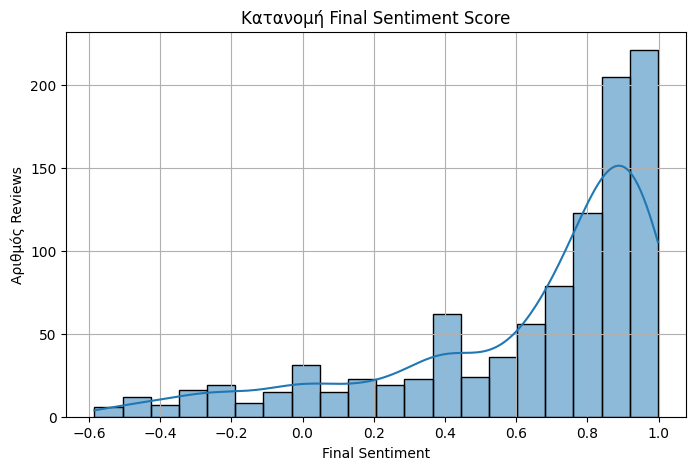

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(review_df["final_sentiment"], bins=20, kde=True)
plt.title("Κατανομή Final Sentiment Score")
plt.xlabel("Final Sentiment")
plt.ylabel("Αριθμός Reviews")
plt.grid(True)
plt.show()

## ⚙️ Task 3: Feature Engineering – Custom Metrics



## ✅ Block 16 – Κατασκευή Νέων Μετρικών (Rating + Votes)

Κατασκευάζουμε νέους δείκτες όπως `adjusted_score` και `quality_score` βασισμένους σε `rating`, `helpful_vote`, `verified_purchase`.

In [24]:
review_df = pd.read_csv("cleaned_raw_review_Electronics.csv")

# Κανονικοποίηση του rating (1–5 → 0–1)
review_df["normalized_rating"] = (review_df["rating"] - 1) / 4

# Κανονικοποίηση helpful votes
review_df["helpful_vote_norm"] = review_df["helpful_vote"] / review_df["helpful_vote"].max()

# Συνδυασμός rating και helpfulness
review_df["adjusted_score"] = review_df["rating"] * (1 + review_df["helpful_vote_norm"])

# Μετατροπή verified purchase σε binary
review_df["verified_binary"] = review_df["verified_purchase"].astype(int)

# Συνδυαστικό score ποιότητας
review_df["quality_score"] =  (0.5 * review_df["normalized_rating"]) + \
                              (0.3 * review_df["helpful_vote_norm"]) + \
                              (0.2 * review_df["verified_binary"])

# Προεπισκόπηση
review_df[["rating", "helpful_vote", "adjusted_score", "quality_score"]].head()


,rating,helpful_vote,adjusted_score,quality_score
0,3.0,0,3.00000,0.45000
1,1.0,0,1.00000,0.20000
2,5.0,0,5.00000,0.70000
3,5.0,18,5.11583,0.70695
4,5.0,0,5.00000,0.70000


## ✅ Συμπεράσματα Part A

Το Part 1 ολοκληρώθηκε με επιτυχία:
- Πλήρης καθαρισμός και ανάλυση για 5 κατηγορίες
- Υπολογισμός sentiment score και συνδυασμός με rating
- Δημιουργία custom features χωρίς χρήση price
- Οπτικοποιήσεις για όλες τις βασικές μεταβλητές

# 📊 Part B – Amazon Reviews 2023: Data Exploration & Feature Engineering


## 🧹 Task 1: Clustering για Ομαδοποίηση Προϊόντων

In [25]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.sparse import hstack, csr_matrix

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## ✅ Block 1 – Preprocessing

In [26]:
# Initialize stemmer and stop words
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

for category in categories:
    meta_category = f"cleaned_raw_meta_{category}"
    print(f"➡️ Επεξεργάζομαι την κατηγορία: {meta_category}")

    # Φόρτωση αρχείου
    file_path = f"amazon_{meta_category}.csv"
    meta_df = pd.read_csv(file_path)

    # Convert 'description' and 'features' lists to strings
    meta_df['description'] = meta_df['description'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
    meta_df['features'] = meta_df['features'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

    # Combine for full text representation
    meta_df['full_text'] = meta_df['description'] + " " + meta_df['features']

    # Initialize stemmer and stopwords
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))

    # Text preprocessing function
    def preprocess_text(text):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\\s]', '', text)
        tokens = text.split()
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return " ".join(tokens)

    # Apply text preprocessing
    meta_df['clean_text'] = meta_df['full_text'].apply(preprocess_text)

    # Fill missing values
    meta_df['price'] = meta_df['price'].fillna(meta_df['price'].median())
    meta_df['average_rating'] = meta_df['average_rating'].fillna(meta_df['average_rating'].median())

    # Standardize price and rating
    scaler = StandardScaler()
    scaled_numerical = scaler.fit_transform(meta_df[['price', 'average_rating']])

    # Αποθήκευση καθαρισμένου αρχείου
    cleaned_path = f"amazon_{meta_category}.csv"
    meta_df.to_csv(cleaned_path, index=False)
    print(f"✅ Αποθηκεύτηκε: {cleaned_path}\n")

➡️ Επεξεργάζομαι την κατηγορία: cleaned_raw_meta_Electronics
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Electronics.csv

➡️ Επεξεργάζομαι την κατηγορία: cleaned_raw_meta_Books
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Books.csv

➡️ Επεξεργάζομαι την κατηγορία: cleaned_raw_meta_Home_and_Kitchen
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Home_and_Kitchen.csv

➡️ Επεξεργάζομαι την κατηγορία: cleaned_raw_meta_Clothing_Shoes_and_Jewelry
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Clothing_Shoes_and_Jewelry.csv

➡️ Επεξεργάζομαι την κατηγορία: cleaned_raw_meta_Sports_and_Outdoors
✅ Αποθηκεύτηκε: amazon_cleaned_raw_meta_Sports_and_Outdoors.csv



## ✅ Block 2 – TF-IDF Vectorization

In [27]:
tfidf = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf.fit_transform(meta_df['clean_text'])

# Combine TF-IDF matrix and scaled numerical data
combined_features = hstack([tfidf_matrix, csr_matrix(scaled_numerical)])

## ✅ Block 3 – Clustering (Elbow Method)

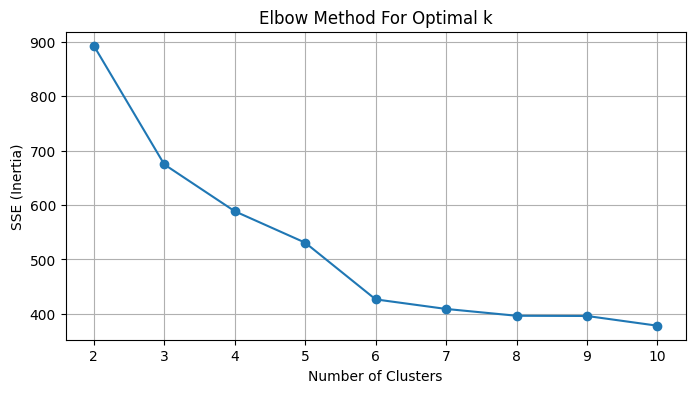

In [28]:
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

## ✅ Block 4 – Applying KMeans and Evaluating

In [29]:
optimal_k = 4  # Example, adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(combined_features)

meta_df['cluster'] = cluster_labels

# Silhouette Score
score = silhouette_score(combined_features, cluster_labels)
print(f"Silhouette Score: {score:.4f}")

Silhouette Score: 0.2839


## ✅ Block 5 – PCA Visulization of Clusters

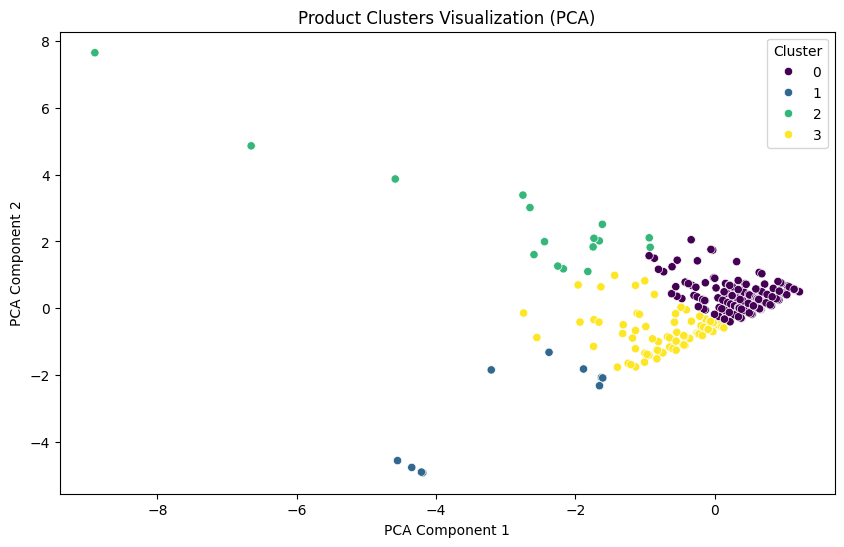

In [30]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(combined_features.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=meta_df['cluster'], palette='viridis')
plt.title('Product Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

## 🧹 Task 2: Recommendation System

## ✅ Block 6 – Data Preparation

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

file_path = f"amazon_cleaned_raw_review_{categories[0]}.csv"
review_df = pd.read_csv(file_path)

cf_df = review_df[['user_id', 'parent_asin', 'rating']].dropna()
cf_df.columns = ['user_id', 'asin', 'rating']

user_item_matrix = cf_df.pivot_table(index='user_id', columns='asin', values='rating').fillna(0)

## ✅ Block 7 – User-Based Collaboration Filtering

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

def predict_user_rating(user_id, asin, k=5):
    if asin not in user_item_matrix.columns or user_id not in user_item_matrix.index:
        return np.nan

    similar_users = user_similarity_df[user_id].drop(user_id).sort_values(ascending=False)

    # Only keep users who rated the target item
    rated_users = user_item_matrix[asin] > 0
    valid_users = similar_users[rated_users[similar_users.index]]

    top_k_users = valid_users.head(k)

    if top_k_users.empty:
        return np.nan

    ratings = user_item_matrix.loc[top_k_users.index, asin]
    sim_scores = top_k_users.values

    return np.dot(ratings, sim_scores) / (np.sum(sim_scores) + 1e-8)

## ✅ Block 8 – Item-Based Collaborative Filtering

In [33]:
# Transpose for item-based
item_user_matrix = user_item_matrix.T

# Item similarity
item_similarity = cosine_similarity(item_user_matrix)
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)

def predict_item_rating(user_id, asin, k=5):
    if asin not in item_user_matrix.index or user_id not in user_item_matrix.index:
        return np.nan

    user_ratings = user_item_matrix.loc[user_id]
    similar_items = item_similarity_df[asin].drop(asin).sort_values(ascending=False)

    # Only use items this user has rated
    rated_items = user_ratings > 0
    valid_items = similar_items[rated_items[similar_items.index]]

    top_k_items = valid_items.head(k)

    if top_k_items.empty:
        return np.nan

    ratings = user_ratings[top_k_items.index]
    sim_scores = top_k_items.values

    return np.dot(ratings, sim_scores) / (np.sum(sim_scores) + 1e-8)

In [34]:
test_user = "AEM663T6XHZFWLODF4US2RCOCUSA"
test_asin = "B07PGL2N7J"

user_cf_rating = predict_user_rating(test_user, test_asin)
item_cf_rating = predict_item_rating(test_user, test_asin)

print(f"User-based predicted rating: {user_cf_rating}")
print(f"Item-based predicted rating: {item_cf_rating}")

User-based predicted rating: 4.99999975627886
Item-based predicted rating: 3.9999999080869997


## ✅ Block 9 – Content-Based Filtering (Cleaning)

In [35]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Join and clean description
cbf_df = meta_df[['parent_asin', 'title', 'description', 'price', 'main_category']].dropna(subset=['description'])
cbf_df['description'] = cbf_df['description'].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
cbf_df['clean_description'] = cbf_df['description'].apply(clean_text)
cbf_df['clean_title'] = cbf_df['title'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## ✅ Block 10 – Content-Based Filtering (Word2Vec)

In [36]:
import gensim.downloader as api
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Load pretrained word2vec
word2vec = api.load("glove-wiki-gigaword-100")

# Convert text to averaged word vectors
def text_to_vector(text):
    words = text.split()
    vectors = [word2vec[word] for word in words if word in word2vec]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

# Apply embedding
cbf_df['text_vector'] = cbf_df['clean_title'] + " " + cbf_df['clean_description']
cbf_df['vector'] = cbf_df['text_vector'].apply(text_to_vector)

# Normalize price
scaler = MinMaxScaler()
cbf_df['scaled_price'] = scaler.fit_transform(cbf_df[['price']])

# Optional: One-hot encode category
category_dummies = pd.get_dummies(cbf_df['main_category'])

# Combine all features into a single vector
feature_matrix = np.vstack(cbf_df['vector'].values)
feature_matrix = np.hstack([feature_matrix, cbf_df[['scaled_price']].values, category_dummies.values])

[==================================================] 100.0% 128.1/128.1MB downloaded


## ✅ Block 11 – CF and CBF Similarites

In [37]:
# Compute cosine similarity between products
similarity_matrix = cosine_similarity(feature_matrix)

# Function to get top-k similar products for a given ASIN
def get_similar_products(asin, top_k=5):
    if asin not in cbf_df['parent_asin'].values:
        return []

    idx = cbf_df[cbf_df['parent_asin'] == asin].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_k+1]

    similar_indices = [i for i, _ in sim_scores]
    return cbf_df.iloc[similar_indices][['parent_asin', 'title', 'price']]

In [38]:
example_asin = cbf_df['parent_asin'].iloc[0]
recommendations = get_similar_products(example_asin, top_k=5)
print(f"Recommended products for ASIN {example_asin}:\n")
print(recommendations)

Recommended products for ASIN B08GC4GBWB:

    parent_asin                                              title  price
17   B07CHSQSWJ  STMAX Roller Skates Women and Girls Classic De...  69.95
215  B0C3476T4J  OMEKOL Two Sizes For Adults and Youth Polarize...  23.89
421  B00XM19F1O      Black Mountain Products Speed Jump Rope Cable   5.00
209  B094ZDJCX6  Rollerex Gladiator Waxed Skate Laces (Multiple...  10.95
387  B0B711HHBP  DAWAY A01 LED Bike Wheel Light (Pack of 1 Tire...  10.99
